<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8B%A4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D_5%EC%9E%A5_%EB%8B%A4%EC%B0%A8%EC%9B%90%EC%B2%99%EB%8F%84%EB%B2%95(MDS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 메트릭 MDS 패키지 & 함수
* stats - cmdscale
* smacof - smacofSym
* vegan - wcmdscale
* ecodist - pco
* labdsv - pco
* ape - pcoa
* ade4 - dudi.pco

> 비메트릭 MDS 패키지 & 함수
* MASS - isoMDS
* vegan - metaMDS

# 메트릭 MDS 분석 예시

In [34]:
#자동차 제원 자료 가져오기
auto_url = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/auto.csv'
auto = read.csv(auto_url, header=T)

In [35]:
head(auto)

,autoName,length,width,enginesize,fuel,price
,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,visto,3495,1495,798,21.5,540
2,tico,3340,1400,796,21.0,550
3,Matiz,3495,1495,796,22.2,555
4,Atos,3495,1495,798,22.0,571
5,Spectra,4510,1720,1493,20.8,540
6,Nubira,4495,1700,1498,16.0,830


In [36]:
#표준화 변수 만들기 : 각 변수의 측정단위가 다름
X = auto[, -1]
autoName = auto[, 1]

#표준화된 변수
zX = scale(X, center = TRUE, scale = TRUE)

#0-1 변환 변수(0-1 transformation)
maxX = apply(X, 2, max)
minX = apply(X, 2, min)
z01X = scale(X, center = minX, scale = maxX - minX)

In [37]:
#거리행렬 만들기
z01X.dist = dist(z01X, method = 'euclidean')
z01X.dist = as.matrix(z01X.dist)

colnames(z01X.dist) = autoName
rownames(z01X.dist) = autoName
z01X.dist

,visto,tico,Matiz,Atos,Spectra,Nubira,Avante,Rio,Lanos,Verna,⋯,Legeanza,Efsonata,Tiburon,Optima,Potentia,Grandeur,Dianasty,Enterprise,Chairman,Equus
visto,0.00000000,0.2236548,0.04628556,0.03422795,0.8028818,0.85623555,0.89869417,0.69440853,0.7678475,0.67787886,⋯,1.1352683,1.20574876,1.1313840,1.23717647,1.5095434,1.5608388,1.81922116,1.85991714,1.9732272,2.0285798
tico,0.22365477,0.0000000,0.23487133,0.23086663,0.9956235,1.01966081,1.06338237,0.86152112,0.9267446,0.84862474,⋯,1.2924575,1.36839095,1.2768621,1.39740720,1.6199792,1.6907158,1.92979029,1.96887095,2.0791541,2.1428544
Matiz,0.04628556,0.2348713,0.00000000,0.01405435,0.8070870,0.87646338,0.91960436,0.71563705,0.7922817,0.69727315,⋯,1.1574515,1.22475225,1.1567825,1.25510370,1.5328099,1.5833780,1.83992655,1.88049961,1.9940955,2.0461634
Atos,0.03422795,0.2308666,0.01405435,0.00000000,0.8054940,0.86973672,0.91268971,0.70874169,0.7843107,0.69123241,⋯,1.1499326,1.21786336,1.1479015,1.24806611,1.5236366,1.5745279,1.83086223,1.87137280,1.9849156,2.0378423
Spectra,0.80288182,0.9956235,0.80708701,0.80549397,0.0000000,0.33082370,0.36128957,0.32691589,0.3964842,0.28979560,⋯,0.5557691,0.58370973,0.6774808,0.62787037,1.0288688,1.0363143,1.34145900,1.38698561,1.5000868,1.5264726
Nubira,0.85623555,1.0196608,0.87646338,0.86973672,0.3308237,0.00000000,0.05483567,0.18458632,0.1529976,0.20636659,⋯,0.2987584,0.38231401,0.4119366,0.43212368,0.7781640,0.7998361,1.12203921,1.16748322,1.2818598,1.3409377
Avante,0.89869417,1.0633824,0.91960436,0.91268971,0.3612896,0.05483567,0.00000000,0.22084978,0.1693772,0.24715876,⋯,0.2522331,0.34097313,0.3729397,0.39459648,0.7526435,0.7639249,1.09352968,1.13912411,1.2530110,1.3131030
Rio,0.69440853,0.8615211,0.71563705,0.70874169,0.3269159,0.18458632,0.22084978,0.00000000,0.1038345,0.05876684,⋯,0.4490397,0.52271184,0.4892960,0.57178786,0.9044668,0.9258902,1.23587865,1.28253544,1.3951125,1.4501387
Lanos,0.76784753,0.9267446,0.79228167,0.78431066,0.3964842,0.15299759,0.16937715,0.10383445,0.0000000,0.15651584,⋯,0.3727338,0.45763986,0.3995779,0.50728199,0.8283250,0.8449056,1.16143629,1.20792669,1.3200962,1.3825966
Verna,0.67787886,0.8486247,0.69727315,0.69123241,0.2897956,0.20636659,0.24715876,0.05876684,0.1565158,0.00000000,⋯,0.4812691,0.55255376,0.5359652,0.60501258,0.9444625,0.9675826,1.27854708,1.32560258,1.4378449,1.4899085


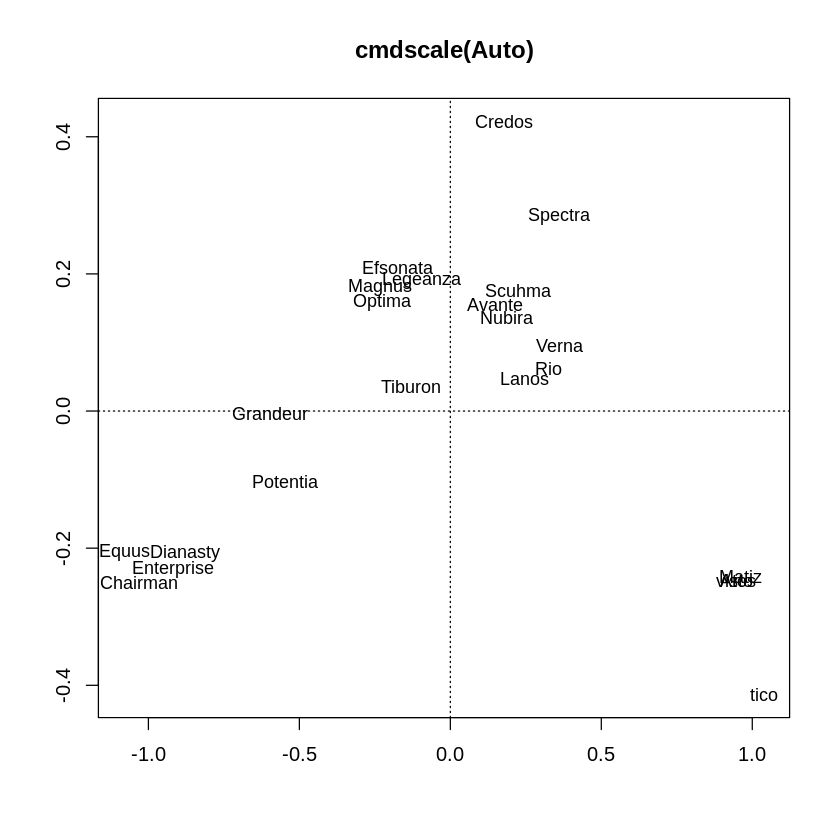

In [38]:
#2차원 cmdscale()을 이용한 MDS 실행
mds1 = cmdscale(z01X.dist, k=2)

#MDS 그림
plot(mds1[, 1], mds1[, 2], type = 'n', xlab = '', ylab = '', main = 'cmdscale(Auto)')
text(mds1[, 1], mds1[, 2], rownames(z01X.dist), cex = 0.9) 
abline(h = 0, v = 0, lty = 3)

* 승용차종이 경차, 소형&중형, 대형 등으로 잘 구분되어 나타남
* 'Credos'가 2000cc 급의 중형차인데도 다른 차들과 떨어져서 나타남
* 원자료 파일에서 Credos의 연비가 20.8km/L이고, 가격이 463만원으로 다른 중형차와 크게 다르게 관측됬기 때문
* 분석결과가 자료에 의존한다는 것을 알 수 있음
* X축 : 경차(저렴)-> 큰차(비쌈) 순서, 크기 또는 가격을 대표함
* Y축 : 크레도스가 특이하게 위치하고 차체 크기에 비하여 연비가 매우 높게 관측되어있음 -> 차체 크기 대비 연비를 대표함
* MDS는 개체들을 대상으로 상호거리를 측정할 수 잇는 자료를 관측한 후 개체들을 저차원 공간상에 표현하여 상호관계를 관측하는 것
*또한 개체 들을 몇 개의 소집단으로 나눌 수 있음


In [17]:
# smackfSym()를 이용한 MDS
install.packages('smacof')
library(smacof)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



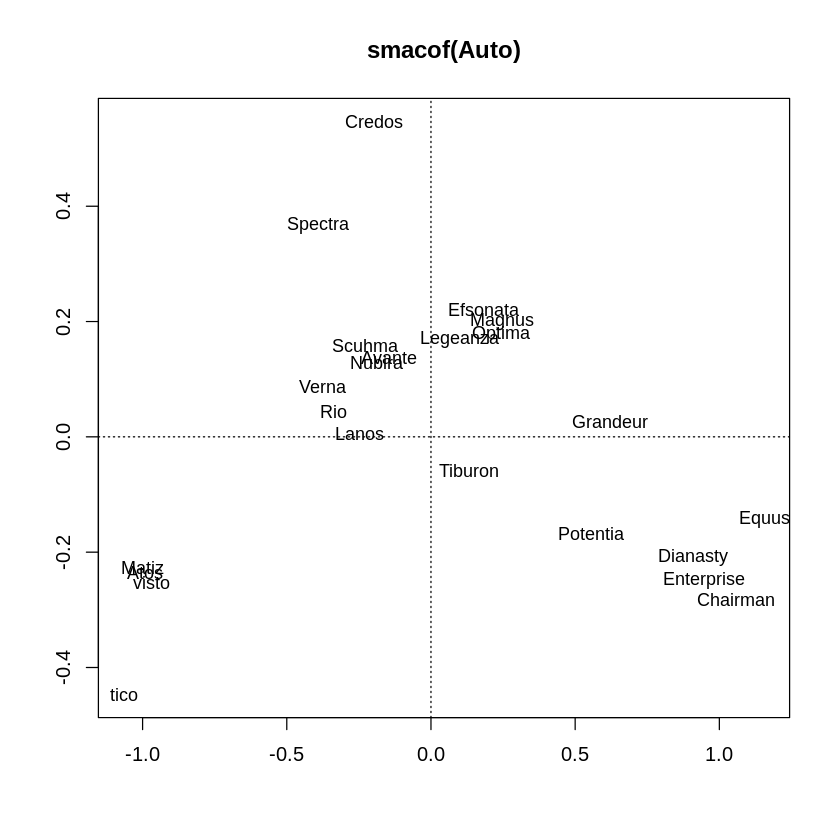

In [39]:
#2차원 메트릭 MDS (비메트릭일경우 metric = FASLE)
mds2 = smacofSym(z01X.dist, ndim = 2)

#그래프
plot(mds2$conf[, 1], mds2$conf[, 2], type = 'n', xlab = '', ylab = '', main = 'smacof(Auto)')
text(mds2$conf[, 1], mds2$conf[, 2], rownames(z01X.dist), cex = 0.9)
abline(h=0, v = 0, lty = 3)

In [40]:
attributes(mds2)

$names
 [1] "delta"     "dhat"      "confdist"  "iord"      "conf"      "stress"   
 [7] "spp"       "ndim"      "weightmat" "resmat"    "rss"       "init"     
[13] "model"     "niter"     "nobj"      "type"      "call"     

$class
[1] "smacofB" "smacof"

* mds2$conf : MDS결과 좌표값
* mds2$stress.m : stress값을 갖는 개체, 낮을 수록 적합도가 좋음


Warning message in plot.xy(xy, type, ...):
“plot type 'lines' will be truncated to first character”


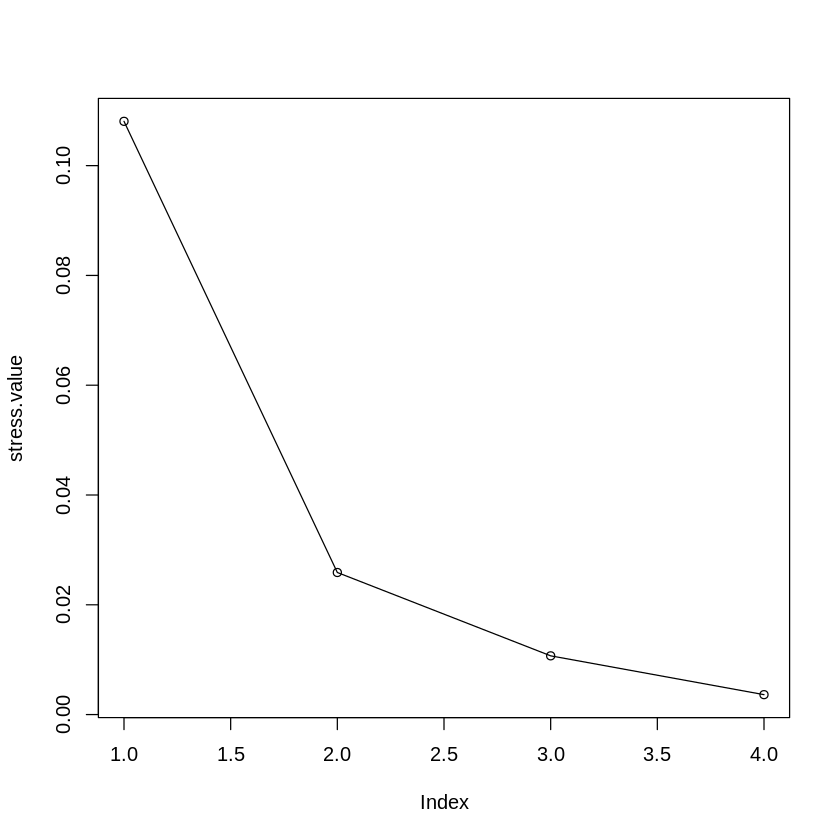

In [41]:
# 스크리 그림 : MDS차원에 따라 스트레스값 나타냄
mds2.1 = smacofSym(z01X.dist, ndim = 1)
mds2.2 = smacofSym(z01X.dist, ndim = 2)
mds2.3 = smacofSym(z01X.dist, ndim = 3)
mds2.4 = smacofSym(z01X.dist, ndim = 4)

stress.value = c(mds2.1$stress, mds2.2$stress, mds2.3$stress, mds2.4$stress)
plot(stress.value, type = "lines")
points(stress.value, cex = 0.9)

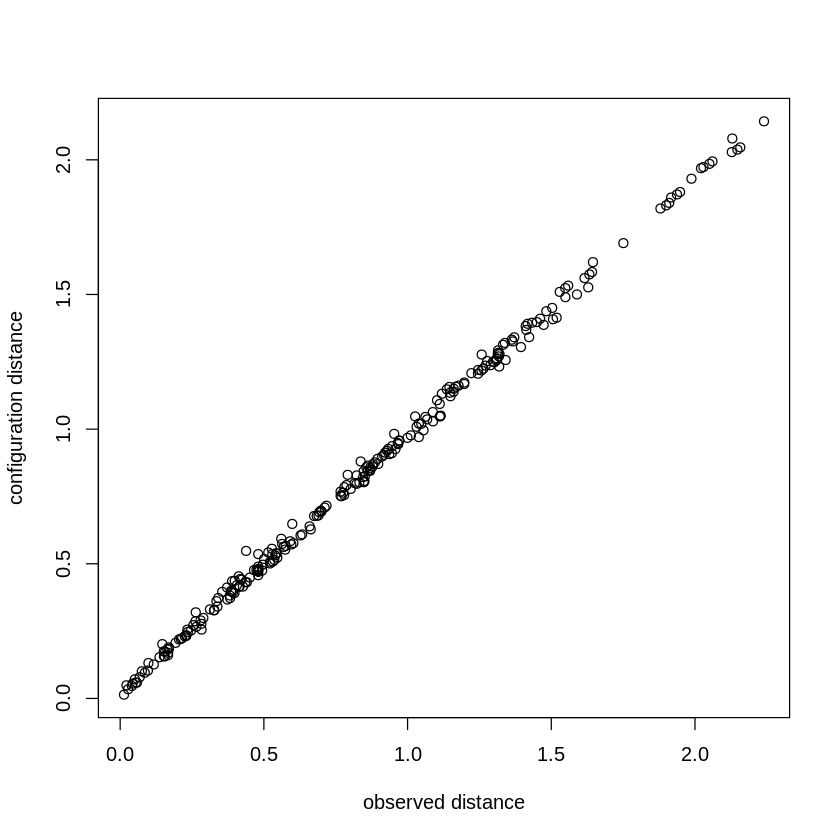

In [46]:
#적합도 진단 그리기
plot(mds2$confdist, mds2$delta, xlab = 'observed distance', ylab = 'configuration distance')

> 측정된 거리와 MDS 그림의 좌표 거리와의 산점도
* X축 : 관측된 거리
* Y축 : 2차원 좌표상에 그려진 거리
* 관측점들이 45도이다 : 2차원 공간상에서 개체들 사이의 거리를 잘표현하고 있다.

# 비메트릭 MDS 분석 예시

In [58]:
#국가 유사성 측정 자료 가져오기
country_url = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/country1968.txt'
countryname_url = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/countryname.txt'

#상.하삼각행렬 -> 대칭행렬로 변환 프로그램
readMatrix <- function() 
{ 
  cat("\n ----  TYPE the DATA File Name : ")
  name <- readline()
  data.m <- scan(name)

        cat("\n -------------------------------")
        cat("\n   (1) Upper Triangular Matrix  ")
        cat("\n   (2) Lower Triangular Matrix  ")
        cat("\n -------------------------------")
        cat("\n   Type the number(Defalut=1) : ")
        upperValue <- readline()
        cat("\n --- Number of rows : ")
        n <- readline()
        n <- as.integer(n)
        if( upperValue == "2")
        { DistanceArray <- array(0, n*(n-1)/2 )
          for(i in 1:(n-1) )
            for(j in (i+1):n )
                { kk1 <- (j-1)*(j-2)/2 + i
                  kk2 <- n*(i-1) - i*(i-1)/2 + j-i
                  DistanceArray[kk2] <- data.m[kk1] }

        }
        else
              DistanceArray <- data.m

      #Data Recode
      DistanceArray = 10 - DistanceArray

      MD <- matrix(0, nrow = n, ncol = n)

      for(j in 1:(n-1) )
        for(k in (j+1) : n )
        {     kk <- n*(j-1) - j*(j-1)/2 + k-j
              MD[j, k] <- MD[k, j] <- DistanceArray[kk]
        }
      return(MD)
} 

In [59]:
data = readMatrix()
#https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/country1968.txt
#2
#12

https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/country1968.txt
2
12

 ----  TYPE the DATA File Name : 
 -------------------------------
   (1) Upper Triangular Matrix  
   (2) Lower Triangular Matrix  
 -------------------------------
   Type the number(Defalut=1) : 
 --- Number of rows : 

In [60]:
country.name = scan(countryname_url, what = '')
colnames(data) = country.name
rownames(data) = country.name
data

,Brazil,Congo,Cuba,Egypt,France,India,Israel,Japan,China,Russia,USA,Yugoslavia
Brazil,0.00,5.17,4.72,6.56,5.28,5.50,6.17,6.50,7.61,6.94,4.61,6.83
Congo,5.17,0.00,5.44,5.00,6.00,5.17,6.67,6.61,6.00,6.61,7.61,6.50
Cuba,4.72,5.44,0.00,4.83,5.89,6.00,6.39,7.06,4.50,4.56,6.83,4.89
Egypt,6.56,5.00,4.83,0.00,5.22,4.17,5.33,6.17,5.61,5.61,6.67,5.72
France,5.28,6.00,5.89,5.22,0.00,6.56,6.00,5.78,6.33,4.94,4.06,5.28
India,5.50,5.17,6.00,4.17,6.56,0.00,5.89,5.50,5.89,5.50,5.72,6.00
Israel,6.17,6.67,6.39,5.33,6.00,5.89,0.00,5.17,7.00,5.83,4.06,5.56
Japan,6.50,6.61,7.06,6.17,5.78,5.50,5.17,0.00,5.83,5.39,3.94,5.72
China,7.61,6.00,4.50,5.61,6.33,5.89,7.00,5.83,0.00,4.28,7.44,4.94
Russia,6.94,6.61,4.56,5.61,4.94,5.50,5.83,5.39,4.28,0.00,5.00,3.33


In [62]:
#비메트릭 MDS isoMDS 함수 실행
library(MASS)
fit = isoMDS(data, k=2)

initial  value 22.139081 
iter   5 value 19.057768
final  value 18.855420 
converged


In [63]:
fit

Brazil,1.7601751,-2.9725809
Congo,-2.2095850,-3.0421037
Cuba,-2.7535795,-0.3547153
Egypt,-1.0716881,-1.4225984
France,0.9691242,0.3820645
India,-0.1108395,-2.0073935
Israel,3.0024371,-0.1595721
Japan,2.2058681,2.2918957
China,-3.1587746,1.5626636
Russia,-0.6589934,2.4348061
USA,3.1061716,1.0144607


* isoMDS 2차원 MDS를 실행함
* stress(fit$stress=18.85542) : 0.189임


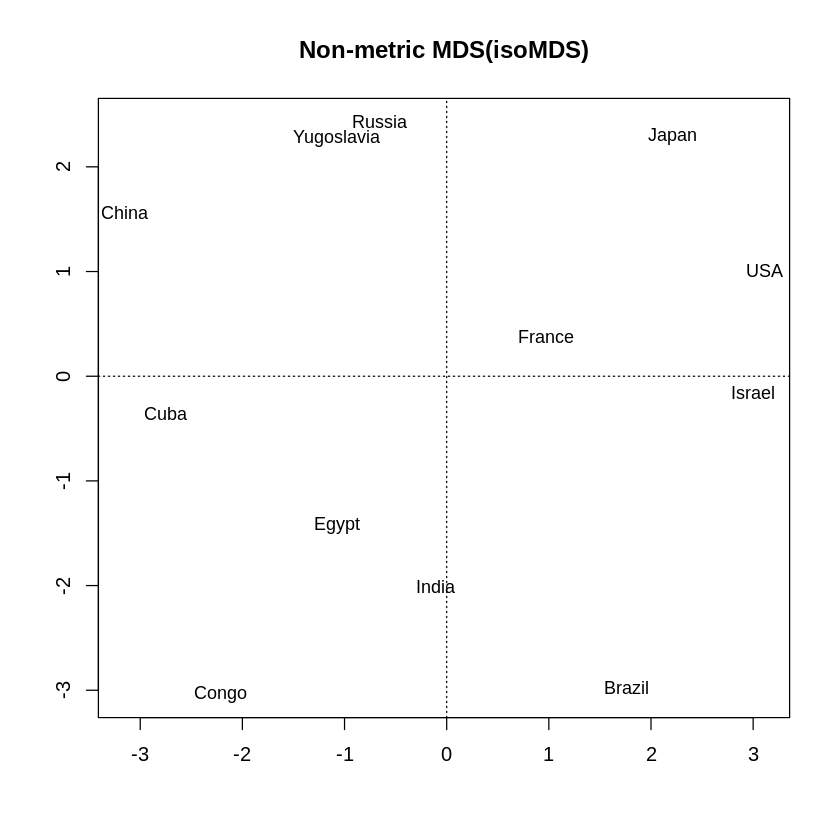

In [64]:
x = fit$points[, 1]
y = fit$points[, 2]
plot(x, y, xlab = '', ylab = '', main = 'Non-metric MDS(isoMDS)', type = 'n')
text(x, y, labels = row.names(data), cex = 0.9)
abline(h = 0, v = 0, lty = 3)

* 오른쪽 대각선 위: USA, France, Japan (선진국)
* 왼쪽 대각선 밑 : Egypt, Inida, Congo (개발도상국)
* 왼쪽 대각선 위 : Russia, Yugoslavia, China (공산국가)

In [66]:
# smackfSym()를 이용한 MDS
install.packages('smacof')
library(smacof)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [69]:
#비메트릭 MDS smacofSym 함수 실행
#MDS 유형 : "interval", "ratio", "ordinal"(nonmetric MDS), 또는"mspline"
fit2 = smacofSym(data, ndim = 2, type = 'ordinal')
names(fit2)

[1] "delta"     "dhat"      "confdist"  "iord"      "conf"      "stress"   
 [7] "spp"       "ndim"      "weightmat" "resmat"    "rss"       "init"     
[13] "model"     "niter"     "nobj"      "type"      "call"

In [70]:
fit2$conf

,D1,D2
Brazil,0.41169746,-0.70455902
Congo,-0.50946729,-0.74542376
Cuba,-0.62764444,-0.06672861
Egypt,-0.29242391,-0.33166633
France,0.22760515,0.08042588
India,-0.03184431,-0.47045298
Israel,0.69453095,0.01085643
Japan,0.52202416,0.51845409
China,-0.71729879,0.38298883
Russia,-0.15031974,0.55043059


In [76]:
fit2$stress

[1] 0.1870599

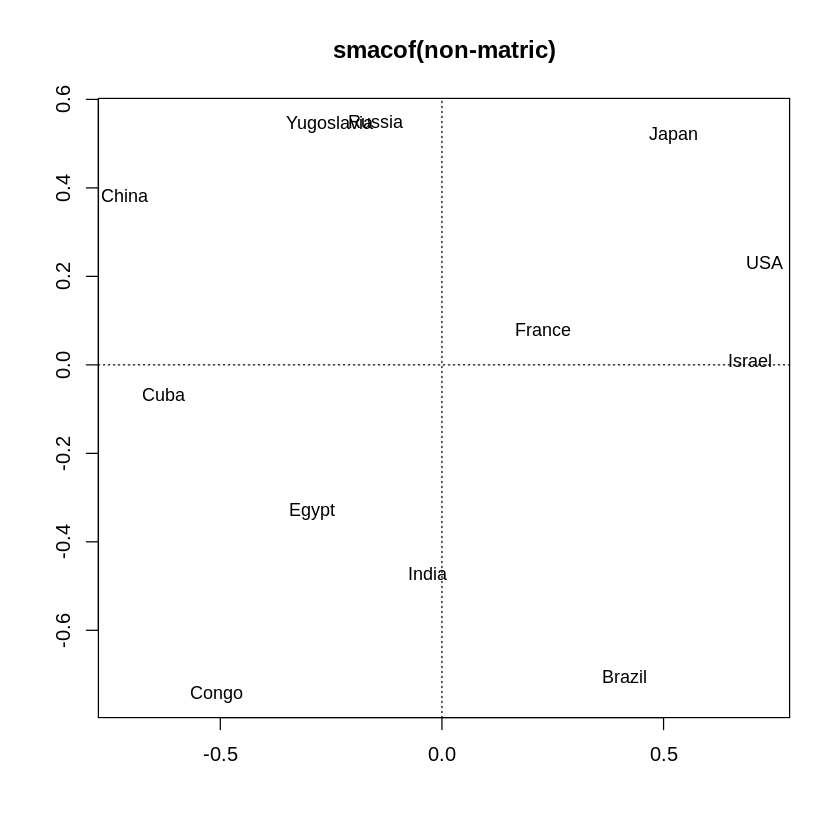

In [77]:
plot(fit2$conf[, 1], fit2$conf[, 2], type = 'n', xlab = '', ylab = '', main = 'smacof(non-matric)')
text(fit2$conf[, 1], fit2$conf[, 2], rownames(data), cex = 0.9)
abline(h=0, v=0, lty = 3)